In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [7]:
dfg = pd.read_csv('wat-r5-good.csv')
dfm = pd.read_csv('wat-r5-mals.csv')

In [8]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,463,0,3,0xead40,0,0,3,2,8,0,0,21,5,451,4,4,24,1,1,1
1,471,2,0,0xead40,1,0,3,2,8,21,5,18,2,467,4,3,24,1,1,1
2,524,0,3,0xead40,2,0,3,2,8,18,2,21,5,512,4,10,20,1,1,1
3,1030,1,3,0xeae40,0,0,3,2,8,0,0,25,9,1018,10,26,30,1,1,1
4,1139,2,4,0x53100,1,0,3,2,8,20,4,18,2,1131,11,21,29,1,1,1


In [9]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,6,6,0
1,83,3,1,0xecf40,3,0,0,4,16,30,14,1,1,66,1,22,59,5,6,0
2,84,3,1,0xecf40,3,1,1,4,16,30,14,1,1,66,1,21,59,4,6,0
3,85,3,1,0xecf40,3,2,1,4,16,30,14,1,1,66,1,19,59,3,6,0
4,86,3,1,0xecf40,3,3,1,4,16,30,14,1,1,66,1,16,59,2,6,0


In [10]:
df = dfg.append(dfm, ignore_index=True)

In [11]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,463,0,3,0xead40,0,0,3,2,8,0,0,21,5,451,4,4,24,1,1,1
1,471,2,0,0xead40,1,0,3,2,8,21,5,18,2,467,4,3,24,1,1,1
2,524,0,3,0xead40,2,0,3,2,8,18,2,21,5,512,4,10,20,1,1,1
3,1030,1,3,0xeae40,0,0,3,2,8,0,0,25,9,1018,10,26,30,1,1,1
4,1139,2,4,0x53100,1,0,3,2,8,20,4,18,2,1131,11,21,29,1,1,1


In [12]:
df = df.sort_values('time')

In [13]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
8663,11,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,6,6,0
8664,83,3,1,0xecf40,3,0,0,4,16,30,14,1,1,66,1,22,59,5,6,0
8665,84,3,1,0xecf40,3,1,1,4,16,30,14,1,1,66,1,21,59,4,6,0
8666,85,3,1,0xecf40,3,2,1,4,16,30,14,1,1,66,1,19,59,3,6,0
8667,86,3,1,0xecf40,3,3,1,4,16,30,14,1,1,66,1,16,59,2,6,0
8668,90,3,1,0xecf40,3,4,2,4,16,30,14,1,1,66,1,3,59,1,6,0
8669,189,3,1,0x1b7e00,3,0,0,4,16,29,13,1,1,174,2,15,63,5,5,0
8670,190,3,1,0x1b7e00,3,1,1,4,16,29,13,1,1,174,2,13,63,4,5,0
8671,191,3,1,0x1b7e00,3,2,1,4,16,29,13,1,1,174,2,12,63,3,5,0
8672,192,3,1,0x1b7e00,3,3,1,4,16,29,13,1,1,174,2,10,63,2,5,0


In [14]:
df.to_csv('wat-r5-pkt.csv',index=False)

In [15]:
df = pd.read_csv("wat-r5-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,6,6,0
1,83,3,1,0xecf40,3,0,0,4,16,30,14,1,1,66,1,22,59,5,6,0
2,84,3,1,0xecf40,3,1,1,4,16,30,14,1,1,66,1,21,59,4,6,0
3,85,3,1,0xecf40,3,2,1,4,16,30,14,1,1,66,1,19,59,3,6,0
4,86,3,1,0xecf40,3,3,1,4,16,30,14,1,1,66,1,16,59,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18986,3250241,1,3,0x61740,4,3,1,2,8,0,0,29,13,3250208,10014,27,44,1,1,1
18987,3250248,1,3,0x61740,4,4,2,2,8,0,0,29,13,3250208,10014,21,44,1,1,1
18988,3250249,1,3,0x27740,0,0,3,2,9,0,0,29,13,3250209,10015,19,44,1,1,1
18989,3250740,4,2,0x621c0,6,0,3,2,8,23,7,0,0,3250726,10018,21,41,1,1,1


In [16]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.128384,0.097367,0.063962,0.003013,-0.004342,-0.352531,-0.324505,-0.195691,-0.306255,0.224230,0.145051,1.000000,0.984308,-0.102945,-0.204539,-0.349189,-0.419673,0.169757
outport,-0.128384,1.000000,-0.424085,0.424469,-0.151881,0.219482,0.320271,0.380102,0.790086,0.774666,-0.802222,-0.598627,-0.128381,-0.127697,0.045576,0.251100,0.070937,0.118527,-0.076694
inport,0.097367,-0.424085,1.000000,-0.158122,0.050561,-0.073066,-0.261676,-0.475520,-0.442345,-0.502261,0.427278,0.363063,0.097364,0.097806,-0.015405,-0.133273,-0.098464,-0.161784,0.062697
packet_type,0.063962,0.424469,-0.158122,1.000000,0.287557,-0.415547,-0.121882,-0.177325,0.296477,0.209074,-0.335769,-0.321849,0.063967,0.068917,0.037421,-0.030456,-0.032141,-0.051126,0.026977
flit_id,0.003013,-0.151881,0.050561,0.287557,1.000000,-0.127175,0.087191,0.021702,-0.097379,-0.048259,0.182777,0.106129,0.003007,0.003655,0.016373,0.036369,0.004847,0.042656,-0.009903
flit_type,-0.004342,0.219482,-0.073066,-0.415547,-0.127175,1.000000,-0.125999,-0.031361,0.140722,0.069738,-0.264130,-0.153367,-0.004346,-0.005281,-0.152715,0.061325,-0.087286,-0.028385,0.014311
vnet,-0.352531,0.320271,-0.261676,-0.121882,0.087191,-0.125999,1.000000,0.914460,0.405891,0.727874,-0.507667,-0.236970,-0.352530,-0.356687,0.177503,0.410872,0.343432,0.393045,-0.223788
vc,-0.324505,0.380102,-0.475520,-0.177325,0.021702,-0.031361,0.914460,1.000000,0.489562,0.755262,-0.520811,-0.320975,-0.324505,-0.327790,0.151931,0.390661,0.316436,0.382581,-0.205592
src_ni,-0.195691,0.790086,-0.442345,0.296477,-0.097379,0.140722,0.405891,0.489562,1.000000,0.894399,-0.770814,-0.838038,-0.195688,-0.193978,0.077100,0.287650,0.139902,0.191522,-0.107867
src_router,-0.306255,0.774666,-0.502261,0.209074,-0.048259,0.069738,0.727874,0.755262,0.894399,1.000000,-0.838174,-0.714404,-0.306252,-0.306361,0.142987,0.411515,0.267579,0.325284,-0.184487


In [17]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [18]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,1,3,0,0,3,2,8,29,13,3,1,6,6
1,3,1,3,0,0,4,16,1,1,66,1,5,6
2,3,1,3,1,1,4,16,1,1,66,1,4,6
3,3,1,3,2,1,4,16,1,1,66,1,3,6
4,3,1,3,3,1,4,16,1,1,66,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18986,1,3,4,3,1,2,8,29,13,3250208,10014,1,1
18987,1,3,4,4,2,2,8,29,13,3250208,10014,1,1
18988,1,3,0,0,3,2,9,29,13,3250209,10015,1,1
18989,4,2,6,0,3,2,8,0,0,3250726,10018,1,1


In [19]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.25,0.75,0.000000,0.00,1.000000,0.0,0.000,1.000000,1.000000,0.000000,0.000000,0.277778,0.277778
1,0.75,0.25,0.500000,0.00,0.000000,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.222222,0.277778
2,0.75,0.25,0.500000,0.25,0.333333,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.166667,0.277778
3,0.75,0.25,0.500000,0.50,0.333333,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.111111,0.277778
4,0.75,0.25,0.500000,0.75,0.333333,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.055556,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18986,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000,1.000000,1.000000,0.999689,0.973838,0.000000,0.000000
18987,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000,1.000000,1.000000,0.999689,0.973838,0.000000,0.000000
18988,0.25,0.75,0.000000,0.00,1.000000,0.0,0.125,1.000000,1.000000,0.999689,0.973935,0.000000,0.000000
18989,1.00,0.50,1.000000,0.00,1.000000,0.0,0.000,0.000000,0.000000,0.999848,0.974227,0.000000,0.000000


In [20]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.424085,0.424469,-0.151881,0.219482,0.320271,0.380102,-0.802222,-0.598627,-0.128381,-0.127697,0.070937,0.118527,-0.076694
1,-0.424085,1.000000,-0.158122,0.050561,-0.073066,-0.261676,-0.475520,0.427278,0.363063,0.097364,0.097806,-0.098464,-0.161784,0.062697
2,0.424469,-0.158122,1.000000,0.287557,-0.415547,-0.121882,-0.177325,-0.335769,-0.321849,0.063967,0.068917,-0.032141,-0.051126,0.026977
3,-0.151881,0.050561,0.287557,1.000000,-0.127175,0.087191,0.021702,0.182777,0.106129,0.003007,0.003655,0.004847,0.042656,-0.009903
4,0.219482,-0.073066,-0.415547,-0.127175,1.000000,-0.125999,-0.031361,-0.264130,-0.153367,-0.004346,-0.005281,-0.087286,-0.028385,0.014311
5,0.320271,-0.261676,-0.121882,0.087191,-0.125999,1.000000,0.914460,-0.507667,-0.236970,-0.352530,-0.356687,0.343432,0.393045,-0.223788
6,0.380102,-0.475520,-0.177325,0.021702,-0.031361,0.914460,1.000000,-0.520811,-0.320975,-0.324505,-0.327790,0.316436,0.382581,-0.205592
7,-0.802222,0.427278,-0.335769,0.182777,-0.264130,-0.507667,-0.520811,1.000000,0.809287,0.224226,0.222948,-0.181237,-0.226153,0.128934
8,-0.598627,0.363063,-0.321849,0.106129,-0.153367,-0.236970,-0.320975,0.809287,1.000000,0.145047,0.141385,-0.112389,-0.141122,0.067287
9,-0.128381,0.097364,0.063967,0.003007,-0.004346,-0.352530,-0.324505,0.224226,0.145047,1.000000,0.984308,-0.349189,-0.419672,0.169757


In [21]:
train_Y = df['target']

In [22]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
18986    1
18987    1
18988    1
18989    1
18990    1
Name: target, Length: 18991, dtype: int64

In [23]:
pca = PCA(0.95)

In [24]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.22178313, -0.78346135,  1.00913583, ..., -0.08219334,
        -0.22013061, -0.22284938],
       [ 1.42607471, -0.54672096, -0.05635431, ..., -0.65432118,
         0.58560983, -0.09311608],
       [ 1.43797548, -0.53133257, -0.04905215, ..., -0.60435934,
         0.55738847, -0.12046701],
       ...,
       [-0.78114622,  0.3813496 ,  0.78891496, ..., -0.51293318,
         0.13179956, -0.23080698],
       [ 0.55222446,  1.2042954 ,  0.11334557, ...,  0.29620764,
         0.10174924, -0.29323168],
       [ 0.55202687,  1.20469583,  0.11326838, ...,  0.29606924,
         0.10186655, -0.29322829]])

In [26]:
pca.explained_variance_ratio_

array([0.31613867, 0.18461111, 0.16085304, 0.10767727, 0.09303917,
       0.06598382, 0.03862009])

In [27]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

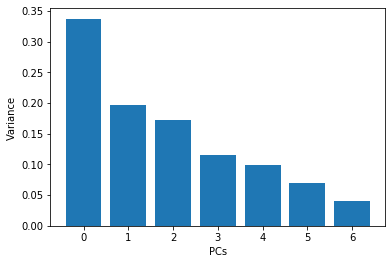

In [28]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [29]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-0.221783,-0.783461,1.009136,-0.177136,-0.082193,-0.220131,-0.222849
1,1.426075,-0.546721,-0.056354,0.570164,-0.654321,0.585610,-0.093116
2,1.437975,-0.531333,-0.049052,0.163725,-0.604359,0.557388,-0.120467
3,1.410277,-0.581871,-0.213741,-0.006840,-0.601447,0.564966,-0.106049
4,1.382579,-0.632410,-0.378431,-0.177405,-0.598534,0.572544,-0.091632
...,...,...,...,...,...,...,...
18986,-0.902954,0.199850,-0.372935,-0.147470,-0.299939,0.049598,-0.277709
18987,-0.888848,0.212110,-0.365813,-0.553089,-0.251328,0.023339,-0.304211
18988,-0.781146,0.381350,0.788915,-0.238201,-0.512933,0.131800,-0.230807
18989,0.552224,1.204295,0.113346,-0.063257,0.296208,0.101749,-0.293232


In [30]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,target
0,-0.221783,-0.783461,1.009136,-0.177136,-0.082193,-0.220131,-0.222849,0
1,1.426075,-0.546721,-0.056354,0.570164,-0.654321,0.585610,-0.093116,0
2,1.437975,-0.531333,-0.049052,0.163725,-0.604359,0.557388,-0.120467,0
3,1.410277,-0.581871,-0.213741,-0.006840,-0.601447,0.564966,-0.106049,0
4,1.382579,-0.632410,-0.378431,-0.177405,-0.598534,0.572544,-0.091632,0
...,...,...,...,...,...,...,...,...
18986,-0.902954,0.199850,-0.372935,-0.147470,-0.299939,0.049598,-0.277709,1
18987,-0.888848,0.212110,-0.365813,-0.553089,-0.251328,0.023339,-0.304211,1
18988,-0.781146,0.381350,0.788915,-0.238201,-0.512933,0.131800,-0.230807,1
18989,0.552224,1.204295,0.113346,-0.063257,0.296208,0.101749,-0.293232,1


In [31]:
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,1.346930e-16,3.799576e-16,-1.735177e-16,-1.362380e-15,-1.198494e-15,-9.830361e-16,-0.160000
1,1.346930e-16,1.000000e+00,7.908716e-17,-6.056604e-17,-8.739767e-16,-6.735038e-16,-8.441765e-16,0.101654
2,3.799576e-16,7.908716e-17,1.000000e+00,2.563896e-16,5.645172e-16,-4.513919e-16,9.331280e-17,0.012107
3,-1.735177e-16,-6.056604e-17,2.563896e-16,1.000000e+00,-1.997353e-16,1.129178e-15,-1.281683e-16,0.001709
4,-1.362380e-15,-8.739767e-16,5.645172e-16,-1.997353e-16,1.000000e+00,1.930199e-15,-1.200551e-15,0.086161
5,-1.198494e-15,-6.735038e-16,-4.513919e-16,1.129178e-15,1.930199e-15,1.000000e+00,2.881654e-15,-0.106285
6,-9.830361e-16,-8.441765e-16,9.331280e-17,-1.281683e-16,-1.200551e-15,2.881654e-15,1.000000e+00,0.018424
target,-1.600002e-01,1.016536e-01,1.210681e-02,1.709476e-03,8.616131e-02,-1.062848e-01,1.842358e-02,1.000000


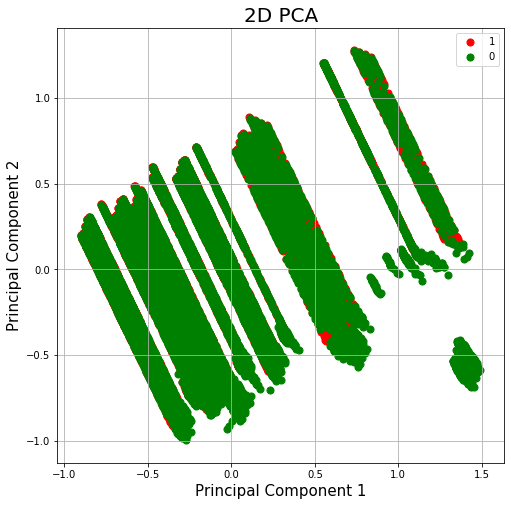

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [33]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,1,3,0,0,3,2,8,1,1,29,13,3,1,57,59,6,6,0
1,3,1,3,0,0,4,16,30,14,1,1,66,1,22,59,5,6,0
2,3,1,3,1,1,4,16,30,14,1,1,66,1,21,59,4,6,0
3,3,1,3,2,1,4,16,30,14,1,1,66,1,19,59,3,6,0
4,3,1,3,3,1,4,16,30,14,1,1,66,1,16,59,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18986,1,3,4,3,1,2,8,0,0,29,13,3250208,10014,27,44,1,1,1
18987,1,3,4,4,2,2,8,0,0,29,13,3250208,10014,21,44,1,1,1
18988,1,3,0,0,3,2,9,0,0,29,13,3250209,10015,19,44,1,1,1
18989,4,2,6,0,3,2,8,23,7,0,0,3250726,10018,21,41,1,1,1


In [34]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [35]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [36]:
seed = 7
np.random.seed(seed)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [38]:
model = Sequential()

In [39]:
n_cols = train_X.shape[1]
n_cols

13

In [40]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [47]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 7747 samples, validate on 5166 samples
Epoch 1/50
7747/7747 [==============================] - 1s 96us/step - loss: 0.1122 - accuracy: 0.8559 - val_loss: 0.1957 - val_accuracy: 0.6816
Epoch 2/50
7747/7747 [==============================] - 1s 99us/step - loss: 0.1066 - accuracy: 0.8603 - val_loss: 0.0992 - val_accuracy: 0.8693
Epoch 3/50
7747/7747 [==============================] - 1s 87us/step - loss: 0.1056 - accuracy: 0.8607 - val_loss: 0.2793 - val_accuracy: 0.5918
Epoch 4/50
7747/7747 [==============================] - 1s 98us/step - loss: 0.1040 - accuracy: 0.8649 - val_loss: 0.1312 - val_accuracy: 0.8103
Epoch 5/50
7747/7747 [==============================] - 1s 104us/step - loss: 0.1024 - accuracy: 0.8647 - val_loss: 0.3559 - val_accuracy: 0.5585
Epoch 6/50
7747/7747 [==============================] - 1s 97us/step - loss: 0.1054 - accuracy: 0.8581 - val_loss: 0.0895 - val_accuracy: 0.8904
Epoch 7/50
7747/7747 [==============================] - 1s 95us/step - loss: 0.09

In [48]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [49]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.45%


In [50]:
dff = pd.read_csv('wat-r5-pkt.csv',nrows=500)

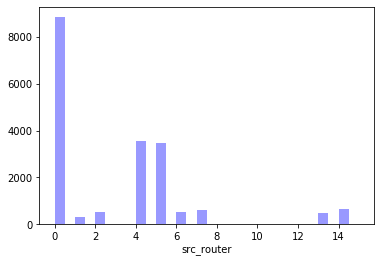

In [51]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

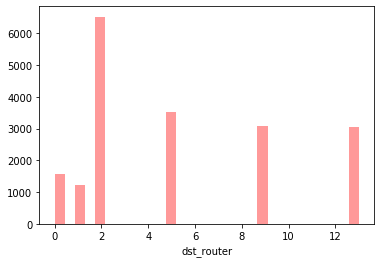

In [52]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

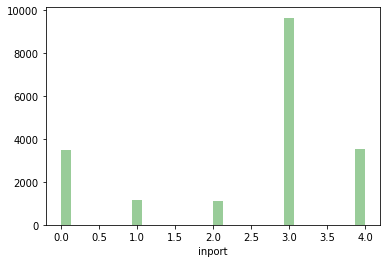

In [53]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

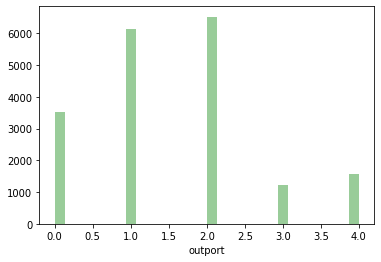

In [54]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

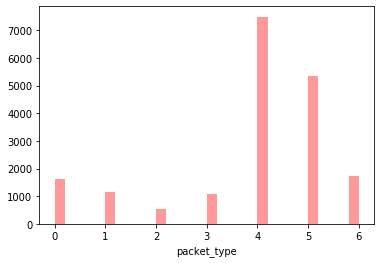

In [55]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')